In [1]:
# You've since been given access to the company's complete recordset of rides. This contains 
# information about every active driver and historic ride, including details like city, driver 
# count, individual fares, and city type.

# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key 
# variables:
# 
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

In [3]:
# Import and Read csv file
city_data = "/Users/kh/Desktop/BOOTCAMP/Week5_Matplotlib/Homework/raw_data/city_data.csv"
ride_data = "/Users/kh/Desktop/BOOTCAMP/Week5_Matplotlib/Homework/raw_data/ride_data.csv"


city_data_pd = pd.read_csv(city_data)
ride_data_pd = pd.read_csv(ride_data)

In [4]:
city_data_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
ride_data_pd.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
# Average Fare ($) Per City

avg_ride = ride_data_pd.groupby("city")["fare"].mean()
# ride_data_pd.dtypes
# type(avg_ride)
# avg_ride.head()

In [7]:
# Total Number of Rides Per City

# to put in a new dataframe, it has to be a panda series, list, or a numpy array

total_ride_sum = ride_data_pd.groupby("city")["fare"].sum()
total_ride_count = ride_data_pd.groupby("city")["fare"].count()

In [8]:
New_ride = pd.DataFrame({"Total Fares Earned": total_ride_sum, 
                         "Total Number of Rides": total_ride_count,
                         "Average Fare": avg_ride
                        })


In [9]:
# Reset the index moved the "city" into a column 
reset = New_ride.reset_index()
# reset.head()

In [10]:
# city_data_pd.head()

In [11]:
all_data = pd.merge(reset, city_data_pd, on="city", how="left")
#Is left appropriate in this case???

# Formatting for all_data dataframe but I can't get it to work!
all_data["Average Fare"] = all_data["Average Fare"].map("{:.2f}".format)
all_data["Total Fares Earned"] = all_data["Total Fares Earned"].map("{:.2f}".format)

# Re-formatting the 
all_data["Average Fare"] = pd.to_numeric(all_data["Average Fare"])
all_data["Total Fares Earned"] = pd.to_numeric(all_data["Total Fares Earned"])

all_data.dtypes

city                      object
Average Fare             float64
Total Fares Earned       float64
Total Number of Rides      int64
driver_count               int64
type                      object
dtype: object

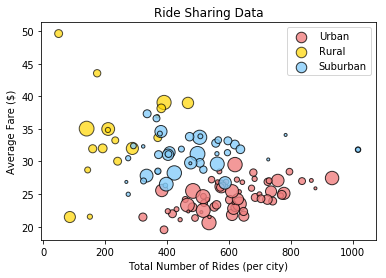

In [12]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key 
# variables:
# 
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)


# Splitting the dataframe into types of cities to graph.

urban = all_data.loc[all_data["type"]=="Urban"]
rural = all_data.loc[all_data["type"]=="Rural"]
suburban = all_data.loc[all_data["type"]=="Suburban"]

# Plotting the cities per city type
urban_plot = plt.scatter(x=urban["Total Fares Earned"], y=urban["Average Fare"], c="lightcoral", 
                         s=all_data["driver_count"]*3, label="Urban", edgecolors='k', alpha=.8)
rural_plot = plt.scatter(x=rural["Total Fares Earned"], y=rural["Average Fare"], c="gold", 
                         s=all_data["driver_count"]*3, label="Rural", edgecolors='k', alpha=.7)
suburban_plot = plt.scatter(x=suburban["Total Fares Earned"], y=suburban["Average Fare"], c="lightskyblue", 
                         s=all_data["driver_count"]*3, label="Suburban", edgecolors='k', alpha=.8)


# Set a Title, axis labels, legend
plt.title("Ride Sharing Data")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")

plt.legend()
# plt.annotate('bubble size correllated with driver count', xy=(2, 1), xytext=(3, 1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

In [13]:
# I need to see the dataframe I'm working with
# all_data.head()

In [14]:
# In addition, you will be expected to produce the following three pie charts:

# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

In [15]:
# Just need the values of the city sum
cities_sum.index.values

NameError: name 'cities_sum' is not defined

Text(0.5,1,'% of Total Fares by City Type')

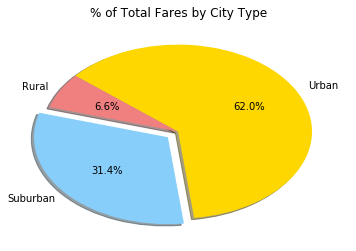

In [16]:
# % of Total Fares by City Type

#sum of all fares per city
cities_sum = all_data.groupby("type")["Total Fares Earned"].sum() 

 # count of all the different types of cities
cities_count = all_data.groupby("type")["Total Fares Earned"].count()

# sum of all fares 
total_cities = cities_sum.sum() 

# Sum of all fares per city divided by the total $ amount of fares collected
percentage = cities_sum/total_cities

color = {"gold", "lightskyblue", "lightcoral"}
explode = [0, 0.1, 0]


plt.pie(percentage, labels=cities_sum.index.values, explode=explode, colors=color, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

In [17]:
# I need to see the dataframe I'm working with
# all_data.head()

Text(0.5,1,'% of Total Rides by City Type')

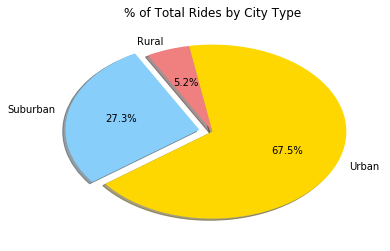

In [18]:
# % of Total Rides by City Type

#sum of all rides per city
cities_rides_sum = all_data.groupby("type")["Total Number of Rides"].sum() 

# sum of all fares 
total_cities_sum = cities_rides_sum.sum() 

# Sum of all fares per city divided by the total $ amount of fares collected
percentage2 = cities_rides_sum/total_cities_sum

color = {"gold", "lightskyblue", "lightcoral"}
explode = [0, 0.1, 0]


plt.pie(percentage2, labels=cities_rides_sum.index.values, explode=explode, colors=color, 
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("% of Total Rides by City Type")

In [19]:
# I need to see the dataframe I'm working with
# all_data.head()

Text(0.5,1,'% of Total Drivers by City Type')

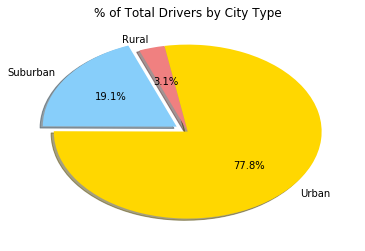

In [20]:
# % of Total Drivers by City Type

#sum of all drivers per city
cities_drivers_sum = all_data.groupby("type")["driver_count"].sum() 

# sum of all drivers 
total_drivers_sum = cities_drivers_sum.sum() 

# Sum of all fares per city divided by the total $ amount of fares collected
percentage3 = cities_drivers_sum/total_drivers_sum

color = {"gold", "lightskyblue", "lightcoral"}
explode = [0, 0.1, 0]


plt.pie(percentage3, labels=cities_drivers_sum.index.values, explode=explode, colors=color, 
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("% of Total Drivers by City Type")

#### Observation 1: There are considerably more urban drivers and than suburban and rural combined.

#### Observation 2: However, there are a handful of suburban cities where the average fare and the total number of rides were greater than most urban cities. It would be interesting to see why.

#### Observation 3: Rural drivers can charge a higher fare on average since there is less demand for rides than other city types.